In [1]:
# pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness_total = pd.read_csv("Resources/WHR 2005 to 2023.csv")
happiness_ref = pd.read_csv("Resources/2019_global_happiness_reference.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [3]:
# happiness_total.info()
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2336 non-null   object 
 1   Regional Indicator                 2336 non-null   object 
 2   Year                               2336 non-null   int64  
 3   Life Ladder                        2336 non-null   float64
 4   Log GDP Per Capita                 2316 non-null   float64
 5   Social Support                     2323 non-null   float64
 6   Healthy Life Expectancy At Birth   2281 non-null   float64
 7   Freedom To Make Life Choices       2303 non-null   float64
 8   Generosity                         2263 non-null   float64
 9   Perceptions Of Corruption          2220 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [4]:
happiness.shape

(2336, 13)

In [5]:
happiness.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [6]:
happiness.isnull().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      55
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                      161
Negative Affect                      153
Confidence In National Government    498
dtype: int64

C:\Users\Sean\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


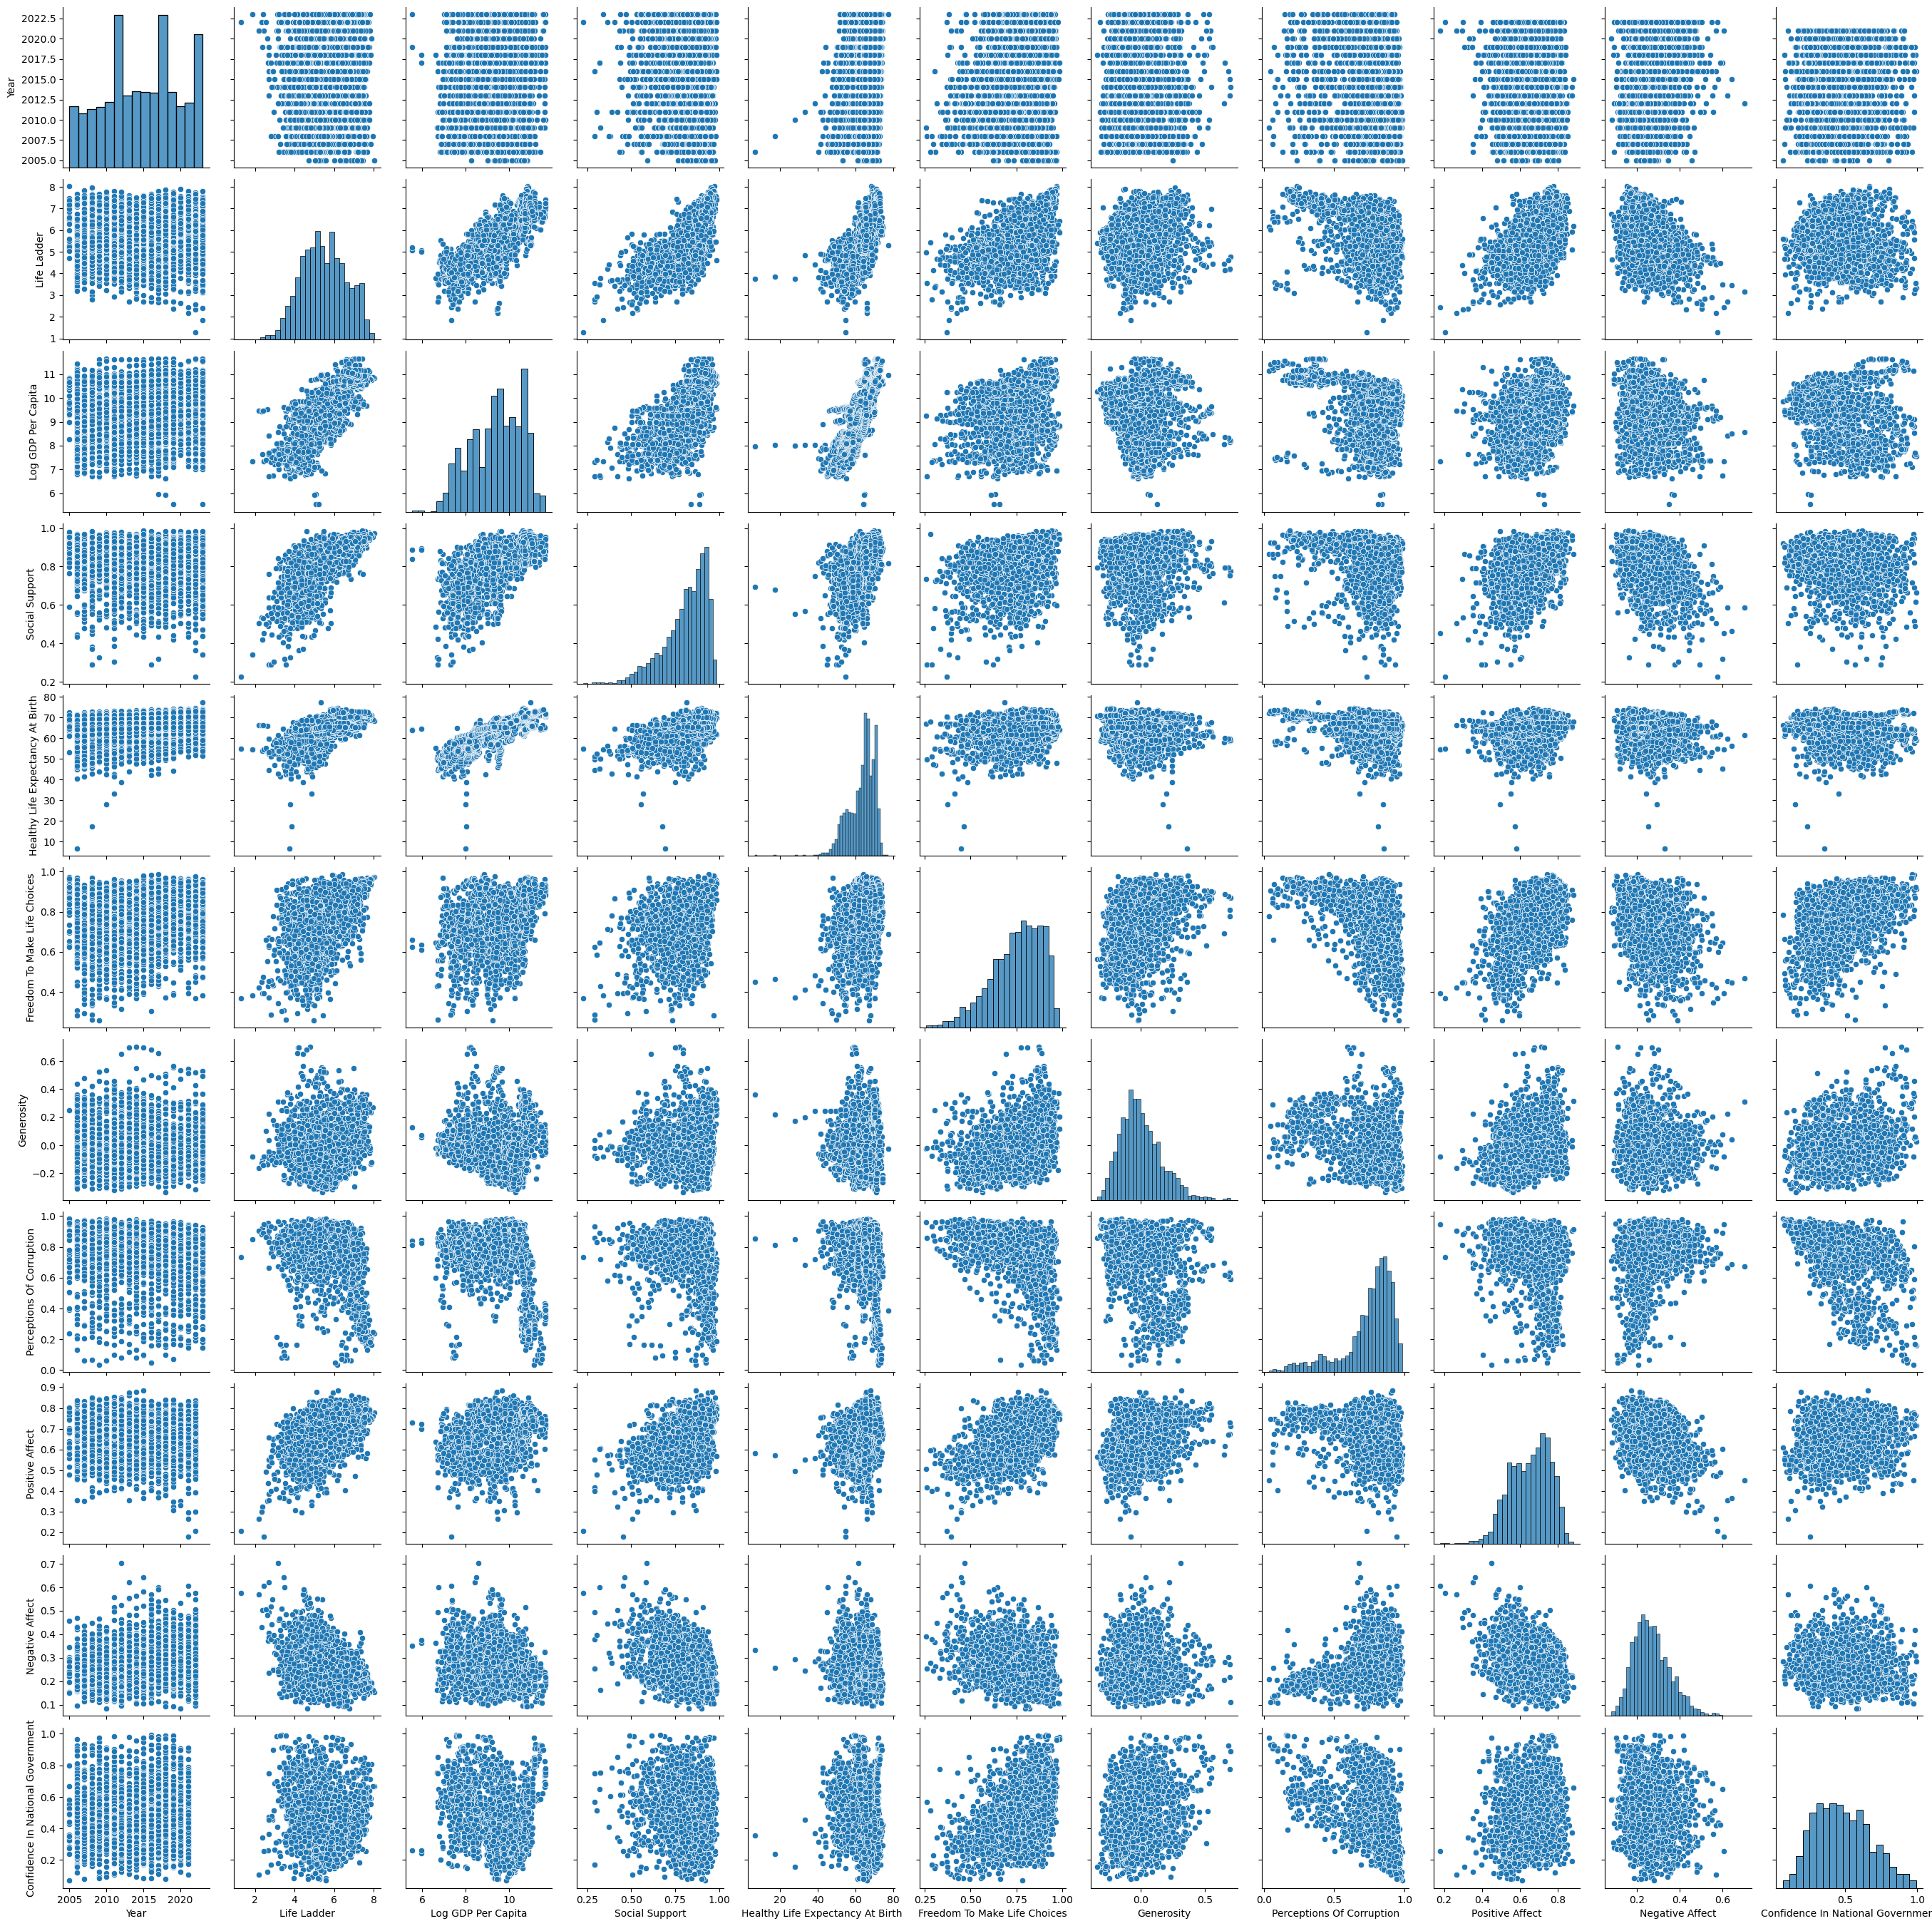

In [7]:
sns.pairplot(happiness)

In [8]:
happiness_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     11 non-null     object
 1   Description  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [9]:
happiness_ref.head(20)

,Variable,Description
0,country,Name of the country.
1,year,"Survey year, ranging from 2005-2018."
2,happiness,A happiness ranking on a scale of 0 to 10.
3,wealth,"Log GDP per capita, which indicates the wealth..."
4,support,A value that indicates how many people have fa...
5,health,Healthy life expectancy at birth.
6,freedom,Satisfaction with individual freedom to make l...
7,generosity,Measure of how likely people are to donate to ...
8,corruption,Measure of national corruption
9,positivity,"Average of measures for happiness, laugh and ..."


In [10]:
cols_to_plot = ['']

In [11]:
# # Creating a list of attributes we want (just copy the column name)
# econ_happiness = ['Life Ladder','Log GDP Per Capita']

# # Creating a dataframe that only contains these attributes
# econ_corr = happiness[econ_happiness]

# # Finding correlation
# econ_corr.corr()

In [12]:
# sns.regplot(data = econ_corr, x = 'Life Ladder', y = 'Log GDP Per Capita').set_title("Happiness score vs Economy")

In [13]:
happiness_total.head(50)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326,0.261179


In [14]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(happiness.select_dtypes(include=np.number))

SimpleImputer()

In [15]:
happiness_imputed = pd.DataFrame(imputer.transform(happiness.select_dtypes(include=np.number)), columns=happiness.select_dtypes(include=np.number).columns)

In [16]:
categorical_cols = happiness.select_dtypes(exclude=np.number).columns
happiness_imputed[categorical_cols] = happiness[categorical_cols]

In [17]:
happiness_imputed.isnull().sum()

Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
Country Name                         0
Regional Indicator                   0
dtype: int64

In [19]:
happiness_imputed.to_csv("Resources/preprocessed_happiness_data.csv", index=False)

In [20]:
X = happiness_imputed.drop(columns=['Life Ladder'])
y = happiness_imputed['Life Ladder']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("X_train data types:")
print(X_train.dtypes)
print("\n")
print("y_train data types:")
print(y_train.dtypes)

X_train data types:
Year                                 float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
Country Name                          object
Regional Indicator                    object
dtype: object


y_train data types:
float64


In [24]:
# Perform one-hot encoding on categorical variables
happiness_encoded = pd.get_dummies(happiness_imputed, columns=['Country Name', 'Regional Indicator'])

In [25]:
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

In [27]:
# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

In [28]:
# Split the encoded data into training and testing sets
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [29]:
# Train the model
model.fit(X_train_encoded, y_train)

LinearRegression()

In [30]:
# Evaluate the model
y_pred = model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.13165907716620812
R^2 Score: 0.8886427556702221
